--- Descripción del dataset: Students Performance ---

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB
None 

Tamaño del dataset: (1000, 10)

Primeras filas del 

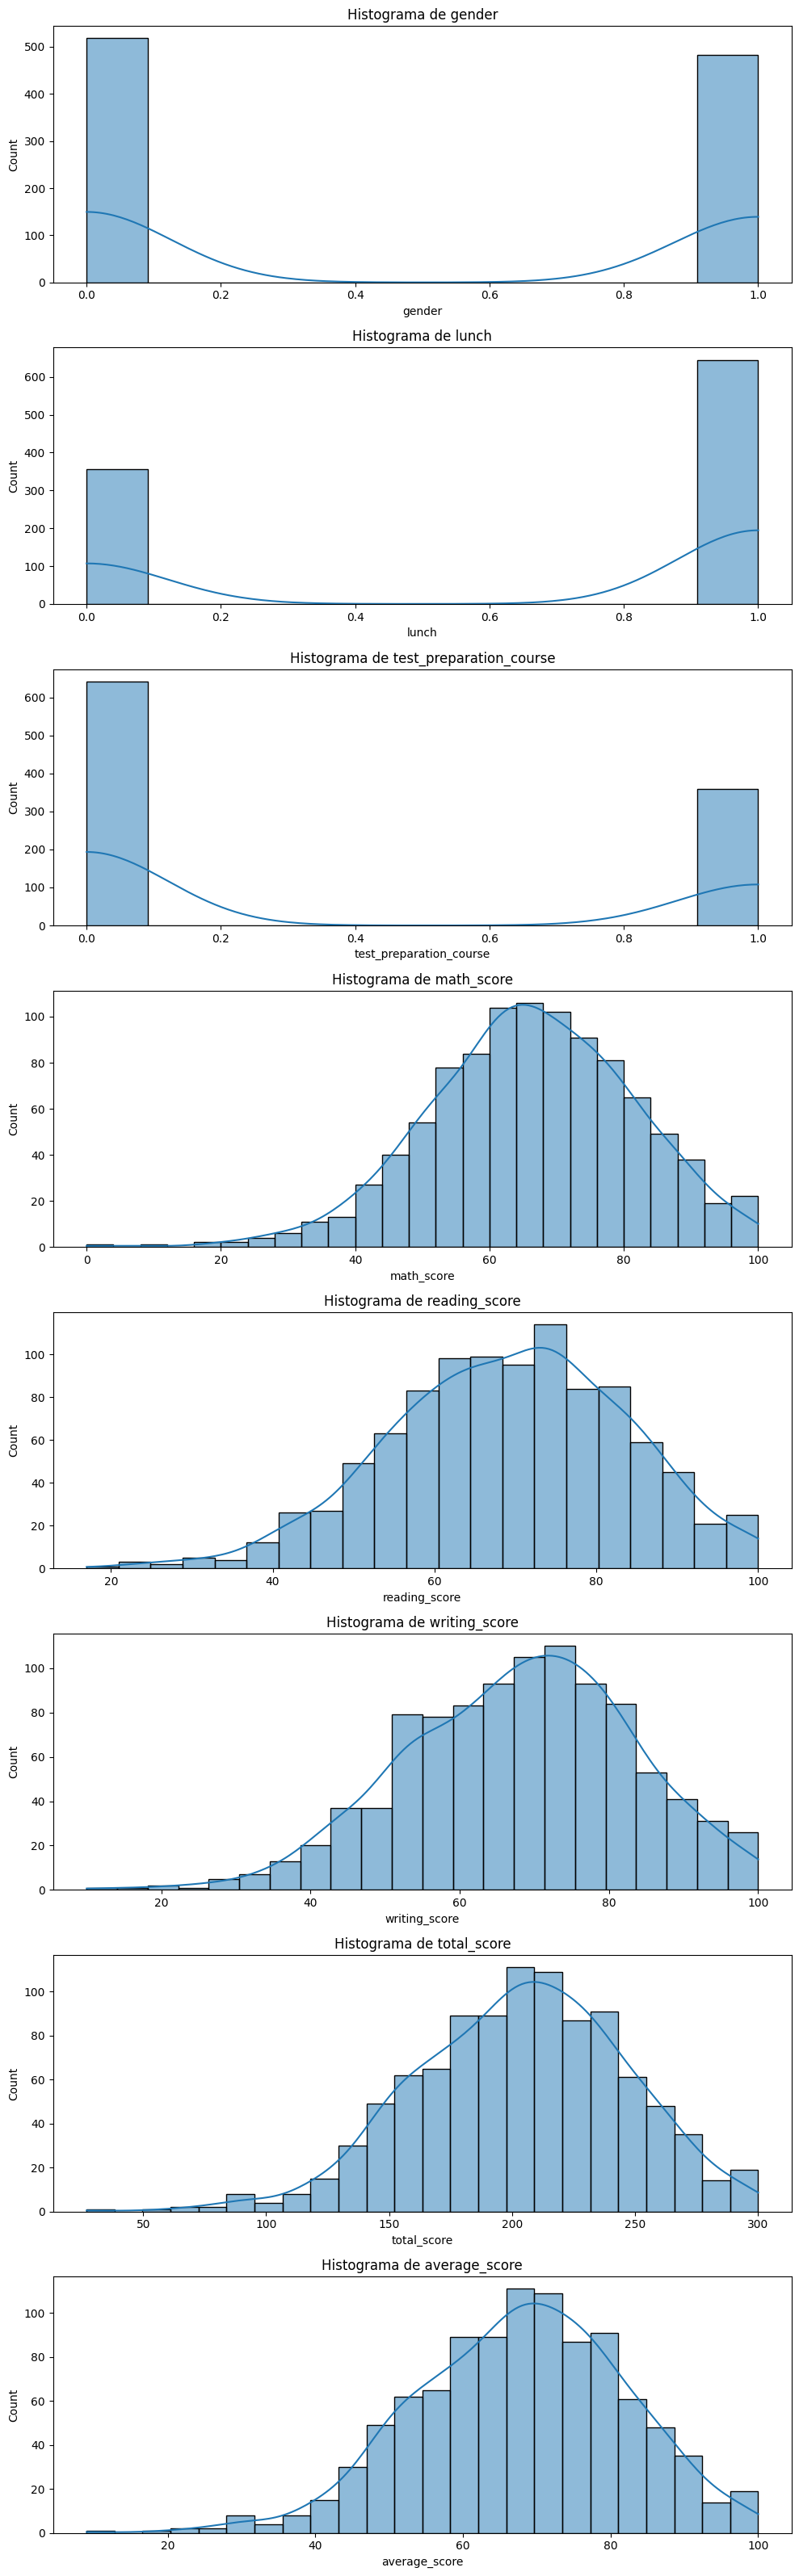

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para cargar y describir el conjunto de datos
def describe_dataset(df, name):
    print(f"--- Descripción del dataset: {name} ---\n")

    # Definir columnas numéricas y categóricas
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    print("Información general:\n")
    print(df.info(), "\n")

    print(f"Tamaño del dataset: {df.shape}\n")

    print("Primeras filas del dataset:\n")
    print(df.head(), "\n")

    print("Descripción estadística:\n")
    print(df.describe(), "\n")

    print("Variables numéricas:\n")
    print(df[num_cols].describe(), "\n")

    print("Variables categóricas:\n")
    for columna in cat_cols:
        print(f"Valores únicos en {columna}:\n")
        print(df[columna].unique(), "\n")

    print("Valores nulos:\n")
    print(df.isnull().sum(), "\n")

    print("Valores duplicados:\n")
    print(df.duplicated().sum(), "\n")

    print("Outliers:\n")
    for columna in num_cols:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].shape[0]
        print(f"Cantidad de outliers en {columna}: {outliers_count}\n")

    # Graficar histogramas para cada columna numérica
    print("Histogramas para variables numéricas:\n")
    plt.figure(figsize=(10, len(num_cols) * 4))
    for i, columna in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 1, i)
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(f"Histograma de {columna}")
    plt.tight_layout()
    plt.show()

# Cargar el dataset y describirlo
df = pd.read_csv('drive/MyDrive/Data_excel/Cleaned_Students_Performance.csv')
describe_dataset(df, 'Students Performance')